# Machine Learning Techniques (CSE6024) Cycle Sheet-3

<h2>ANKITA SINHA (20MCI0003)</h2>


<h3> Team Members: 20MCI0014, and 20MCI0010 </h3>

<p><b>Libraries used:</b> numpy, pandas, matplotlib.pyplot, math, random, and itertools.</p>
<p><b> Datasets used:</b> transations.txt, satgpa</p>
<h2>Association rule mining-Apriori Program</h2>

In [1]:
import numpy as np
import pandas as pd
import random
import itertools

In [2]:
data = open("transations.txt")

with data as d:
    for line in d:
        print(line)

chocolate candy coke mango peanut

pen luggage comforter bag cap detergent towel 

chocolate pen candy luggage 

chococate candy coke 

pen luggage comforter bag

chocolate candy coke mango

pen luggage comforter bag cap 

pen luggage comforter bag cap detergent 

pen luggage comforter

candy mango luggage bag

coke peanut detergent towel

mango pen comforter cap

bag cap towel peanut

pen luggage comforter chocolate candy

pen luggage comforter mango peanut

comforter bag cap candy coke mango

peanut candy cap towel

pen peanut comforter chocolate 

pen peanut comforter chocolate cap candy

chocolate peanut mango luggage bag towel detergent 



In [3]:
support = int(input("Please enter support value in %: "))
confidence = int(input("Please enter confidence value in %: "))


Please enter support value in %: 50
Please enter confidence value in %: 50


In [4]:
C1 = {}
transactions = 0
D = []
T = []
with open("transations.txt", "r") as f:
    for line in f:
        T = []
        transactions += 1
        for word in line.split():
            T.append(word)
            if word not in C1.keys():
                C1[word] = 1
            else:
                count = C1[word]
                C1[word] = count + 1
        D.append(T)
print(D)

[['chocolate', 'candy', 'coke', 'mango', 'peanut'], ['pen', 'luggage', 'comforter', 'bag', 'cap', 'detergent', 'towel'], ['chocolate', 'pen', 'candy', 'luggage'], ['chococate', 'candy', 'coke'], ['pen', 'luggage', 'comforter', 'bag'], ['chocolate', 'candy', 'coke', 'mango'], ['pen', 'luggage', 'comforter', 'bag', 'cap'], ['pen', 'luggage', 'comforter', 'bag', 'cap', 'detergent'], ['pen', 'luggage', 'comforter'], ['candy', 'mango', 'luggage', 'bag'], ['coke', 'peanut', 'detergent', 'towel'], ['mango', 'pen', 'comforter', 'cap'], ['bag', 'cap', 'towel', 'peanut'], ['pen', 'luggage', 'comforter', 'chocolate', 'candy'], ['pen', 'luggage', 'comforter', 'mango', 'peanut'], ['comforter', 'bag', 'cap', 'candy', 'coke', 'mango'], ['peanut', 'candy', 'cap', 'towel'], ['pen', 'peanut', 'comforter', 'chocolate'], ['pen', 'peanut', 'comforter', 'chocolate', 'cap', 'candy'], ['chocolate', 'peanut', 'mango', 'luggage', 'bag', 'towel', 'detergent']]


In [5]:
L1 = []
for key in C1:
    if (100 * C1[key]/transactions) >= support:
        list = []
        list.append(key)
        L1.append(list)
        
print("FREQUENT 1-ITEMSET")
print(L1)


FREQUENT 1-ITEMSET
[['pen'], ['luggage'], ['comforter']]


In [6]:
def apriori(Lk_1, k):
    length = k
    Ck = [] 
    for list1 in Lk_1:
        for list2 in Lk_1:
            count = 0
            c = []
            if list1 != list2:
                while count < length-1:
                    if list1[count] != list2[count]:
                        break
                    else:
                        count += 1
                else:
                    if list1[length-1] < list2[length-1]:
                        for item in list1:
                            c.append(item)
                        c.append(list2[length-1])
                        if not has_infrequent_subset(c, Lk_1, k):
                            Ck.append(c) 
                            c = []
    return Ck

In [7]:
def candidateSet(S,m):
    return set(itertools.combinations(S, m))

def has_infrequent_subset(c, Lk_1, k):
    list = []
    list = candidateSet(c,k)
    for item in list: 
        s = []
        for l in item:
            s.append(l)
        s.sort()
        if s not in Lk_1:
            return True
    return False

In [8]:
def frequentItemsets():
    k = 2
    Lk_1 = []
    Lk = []
    L = []
    count = 0
    transactions = 0
    for item in L1:
        Lk_1.append(item)
    while Lk_1 != []:
        Ck = []
        Lk = []
        Ck = apriori(Lk_1, k-1)
        #print "CANDIDATE %d-ITEMSET" % k
        #print "Ck: %s" % Ck
        for c in Ck:
            count = 0
            transactions = 0
            s = set(c)
            for T in D:
                transactions += 1
                t = set(T)
                if s.issubset(t) == True:
                    count += 1
            if (100 * count/transactions) >= support:
                c.sort()
                Lk.append(c)
        Lk_1 = []
        print("FREQUENT %d-ITEMSET" % k)
        print(Lk)
        for l in Lk:
            Lk_1.append(l)
        k += 1
        if Lk != []:
            L.append(Lk)
    
    return L

In [9]:
def associationRuleGen():
    s = []
    r = []
    length = 0
    count = 1
    inc1 = 0
    inc2 = 0
    num = 1
    m = []
    L= frequentItemsets()
    print("ASSOCIATION RULES:")
    print("RULES \t \t \t \t   SUPPORT  CONFIDENCE")
    for list in L:
        for l in list:
            length = len(l)
            count = 1
            while count < length: 
                s = []
                r = candidateSet(l,count)
                count += 1
                for item in r:
                    inc1 = 0
                    inc2 = 0
                    s = []
                    m = []
                    for i in item:
                        s.append(i)
                    for T in D:
                        if set(s).issubset(set(T)) == True:
                            inc1 += 1
                        if set(l).issubset(set(T)) == True:
                            inc2 += 1
                    if 100*inc2/inc1 >= confidence:
                        for index in l:
                            if index not in s:
                                m.append(index)
                        print("Rule  %d : %s --> %s     %d     %d" %(num, s, m, 100*inc2/len(D), 100*inc2/inc1))
                        num += 1  

associationRuleGen()

FREQUENT 2-ITEMSET
[['comforter', 'pen']]
FREQUENT 3-ITEMSET
[]
ASSOCIATION RULES:
RULES 	 	 	 	   SUPPORT  CONFIDENCE
Rule  1 : ['comforter'] --> ['pen']     50     90
Rule  2 : ['pen'] --> ['comforter']     50     90


<h2>K-Nearest Neighbors (KNN) Program</h2>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Use matplotlib in Jupyter Notebook Outputs
%matplotlib inline

In [11]:
X = [[1590,2.9], [1540,2.7], [1600,2.6], [1590,2.7], [1520,2.5], [1540,2.4], [1560,2.3], [1490,2.3], [1510,2.4],
     [1350,3.9], [1360,3.7], [1370,3.8], [1380,3.7], [1410,3.6], [1420,3.9], [1430,3.4], [1450,3.7], [1460,3.2],
     [1590,3.9], [1540,3.7], [1600,3.6], [1490,3.7], [1520,3.5], [1540,3.4], [1560,3.3], [1460,3.3], [1510,3.4],
     [1340,2.9], [1360,2.4], [1320,2.5], [1380,2.6], [1400,2.1], [1320,2.5], [1310,2.7], [1410,2.1], [1305,2.5],
     [1460,2.7], [1500,2.9], [1300,3.5], [1320,3.6], [1400,2.7], [1300,3.1], [1350,3.1], [1360,2.9], [1305,3.9], 
     [1430,3.0], [1440,2.3], [1440,2.5], [1380,2.1], [1430,2.1], [1400,2.5], [1420,2.3], [1310,2.1], [1350,2.0]]

Y = ['accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted',
     'accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted',
     'accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted',
     'rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected',
     'rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected',
     'rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected']

[]

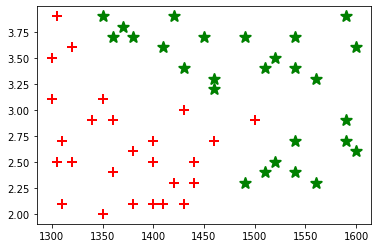

In [12]:
for i in range(len(X)):
    if Y[i] == 'accepted':
        plt.scatter(X[i][0], X[i][1], s=120, marker='*', linewidths=2, color='green')
    else:
        plt.scatter(X[i][0], X[i][1], s=120, marker='+', linewidths=2, color='red')
        
plt.plot()

In [13]:
def most_found(array):
    list_of_words = []
    for i in range(len(array)):
        if array[i] not in list_of_words:
            list_of_words.append(array[i])
            
    most_counted = ''
    n_of_most_counted = None
    
    for i in range(len(list_of_words)):
        counted = array.count(list_of_words[i])
        if n_of_most_counted == None:
            most_counted = list_of_words[i]
            n_of_most_counted = counted
        elif n_of_most_counted < counted:
            most_counted = list_of_words[i]
            n_of_most_counted = counted
        elif n_of_most_counted == counted:
            most_counted = None
            
    return most_counted

In [14]:
def find_neighbors(point, data, labels, k=3):
    n_of_dimensions = len(point)
    
    neighbors = []
    neighbor_labels = []
    
    for i in range(0, k):
        nearest_neighbor_id = None
        smallest_distance = None
        
        for i in range(0, len(data)):
            eucledian_dist = 0
            for d in range(0, n_of_dimensions):
                dist = abs(point[d] - data[i][d])
                eucledian_dist += dist
                
            eucledian_dist = np.sqrt(eucledian_dist)
            
            if smallest_distance == None:
                smallest_distance = eucledian_dist
                nearest_neighbor_id = i
            elif smallest_distance > eucledian_dist:
                smallest_distance = eucledian_dist
                nearest_neighbor_id = i
                
        neighbors.append(data[nearest_neighbor_id])
        neighbor_labels.append(labels[nearest_neighbor_id])
        
        data.remove(data[nearest_neighbor_id])
        labels.remove(labels[nearest_neighbor_id])
    return neighbor_labels

In [15]:
def k_nearest_neighbor(point, data, labels, k=3):
    while True:
        neighbor_labels = find_neighbors(point, data, labels, k=k)
        label = most_found(neighbor_labels)
        if label != None:
            break
        k += 1
        if k >= len(data):
            break
            
    return label

In [16]:
point = [1500, 2.3]
k_nearest_neighbor(point, X, Y, k=5)

'accepted'

<h2>Multi Layer Perceptron Program</h2>

In [17]:
import numpy as np
import pandas as pd 
import random 
import math
from numpy import dot,exp

In [18]:
def Network( model_structure):
    global no_of_layers 
    global model 
    global W 
    
    np.random.seed(0)     
    no_of_layers = len(model_structure)
    
    model = model_structure
    W = [] 

    c = no_of_layers - 1

    for Layer in range(c):
        w = 2*np.random.rand(model[Layer] + 1, model[Layer+1]) -1
        W.append(w)

In [19]:
e=np.exp 

def tanh(x):
    return (1.0 - e(-2*x))/(1.0 + e(-2*x))

def dy_dxTanh(x):
    return (1 + tanh(x))*(1 - tanh(x))

In [20]:
def MultiLayerPerceptron( a,actual_value,alpha): 
        y = a
        d=len(W)-1
        for i in range(d):
            weighted_sum = np.dot(y[i], W[i]) 
            f_of_x = tanh(weighted_sum) 
            f_of_x = np.concatenate((np.ones(1), np.array(f_of_x)))
            y.append(f_of_x)
        
        weighted_sum = np.dot(y[-1], W[-1]) 
        f_of_x = tanh(weighted_sum)    
        y.append(f_of_x)
    
        error = actual_value - y[-1]      
        change = [error * dy_dxTanh(y[-1])] 

        for i in range(no_of_layers-2, 0, -1):
            error = change[-1].dot(W[i][1:].T) 
            error = error*dy_dxTanh(y[i][1:])
            change.append(error)
        change.reverse()
        
        for i in range(len(W)):
            Layer = y[i].reshape(1, model[i]+1)
            delta = change[i].reshape(1, model[i+1])
            W[i] = W[i]+ alpha*Layer.T.dot(delta)

In [21]:
def fit( data, target_labels, alpha, epochs=100):
        ans = np.ones((1, data.shape[0]))
        Zita = np.concatenate((ans.T, data), axis=1)
        
        for m in range(epochs):
            example = np.random.randint(X.shape[0])
            x = [Zita[example]]  
            actual_value = target_labels[example]
            y = MultiLayerPerceptron(x,actual_value,alpha)

In [22]:
def predict_1( x):  
    val = np.concatenate((np.ones(1).T, np.array(x)))
    for i in range(0, len(W)):
        val = tanh(np.dot(val, W[i]))
        val = np.concatenate((np.ones(1).T, np.array(val)))
    return val[1]
    
def predict( X):
    value = np.array([]).reshape(0, model[-1])
    for p in X:  
        y_pred = np.array([[predict_1(p)]]) 
        value = np.vstack((value,y_pred))
    return value

In [23]:
Network([2,2,1])

In [24]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

learning_rate=0.1  
fit(X, y,learning_rate, epochs=6000)

In [25]:
print("Final prediction")
l=[]
i=0
for s in X:
    p = predict_1(s)
    if p >0.5:
        l.append(1)
    else:
        l.append(0)
    print(s," ",l[i]," ","[",p,"]")
    i=i+1

Final prediction
[0 0]   0   [ 0.005625211435814411 ]
[0 1]   1   [ 0.9922099656276941 ]
[1 0]   1   [ 0.9915443580479176 ]
[1 1]   0   [ 0.01694332658239065 ]
